## Missing Appointment at the doctor predictor

Step 1: Clean the dataset`


In [2]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = './Missed_Appointment.csv'
raw_columns = ['Patient_ID', 'Appointment_ID', 
    'Patient_Gender', 'Appointment_ScheduledDate',
    'Appointment_Date', 'Patient_Age', 
    'Patient_Neighbourhood', 'Patient_Scholarship',
    'Patient_Hypertension', 'Patient_Diabetes',
    'Patient_Alcoholism', 'Patient_Handicap',
    'SMS_Received', 'No_Show']

raw_data = pd.read_csv(filename)
raw_data.columns = raw_columns
raw_data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID                   110527 non-null float64
Appointment_ID               110527 non-null int64
Patient_Gender               110527 non-null object
Appointment_ScheduledDate    110527 non-null object
Appointment_Date             110527 non-null object
Patient_Age                  110527 non-null int64
Patient_Neighbourhood        110527 non-null object
Patient_Scholarship          110527 non-null int64
Patient_Hypertension         110527 non-null int64
Patient_Diabetes             110527 non-null int64
Patient_Alcoholism           110527 non-null int64
Patient_Handicap             110527 non-null int64
SMS_Received                 110527 non-null int64
No_Show                      110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Handeling Type
Based on this output, we can see that we do not have any missing data and that we have 5 columns of type object. We start by working on the time objects

In [4]:
def cleanTimeStamps(data):
    data[['Appointment_ScheduledDate']] = data.Appointment_ScheduledDate.apply(np.datetime64)
    data['Appointment_Scheduled_Year'] = data.Appointment_ScheduledDate.apply(lambda x: x.year)
    data['Appointment_Scheduled_Month'] = data.Appointment_ScheduledDate.apply(lambda x: x.month)
    data['Appointment_Scheduled_Day'] = data.Appointment_ScheduledDate.apply(lambda x: x.day)
    data['Appointment_Scheduled_Hour'] = data.Appointment_ScheduledDate.apply(lambda x: x.hour)
    data['Appointment_Scheduled_Minute'] = data.Appointment_ScheduledDate.apply(lambda x: x.minute)
    data['Appointment_Scheduled_Second'] = data.Appointment_ScheduledDate.apply(lambda x: x.second)

    
    data[['Appointment_Date']] = data.Appointment_Date.apply(np.datetime64)
    data['Appointment_Date_Year'] = data.Appointment_Date.apply(lambda x: x.year)
    data['Appointment_Date_Month'] = data.Appointment_Date.apply(lambda x: x.month)
    data['Appointment_Date_Day'] = data.Appointment_Date.apply(lambda x: x.day)
    
    print(data.info())
    
cleanTimeStamps(raw_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 23 columns):
Patient_ID                      110527 non-null float64
Appointment_ID                  110527 non-null int64
Patient_Gender                  110527 non-null object
Appointment_ScheduledDate       110527 non-null datetime64[ns]
Appointment_Date                110527 non-null datetime64[ns]
Patient_Age                     110527 non-null int64
Patient_Neighbourhood           110527 non-null object
Patient_Scholarship             110527 non-null int64
Patient_Hypertension            110527 non-null int64
Patient_Diabetes                110527 non-null int64
Patient_Alcoholism              110527 non-null int64
Patient_Handicap                110527 non-null int64
SMS_Received                    110527 non-null int64
No_Show                         110527 non-null object
Appointment_Scheduled_Year      110527 non-null int64
Appointment_Scheduled_Month     110527 non-null int64
Ap

### Rendering to numerical data
In this step, we will focus on transforming our data into numerical data. Convention used:
'No' -> 0 
'Yes' -> 1
'F' -> 0
'M' -> 1

In [5]:
## No Show target class
raw_data['No_Show'] = raw_data.No_Show.apply(lambda x: 1 if x=='Yes' else 0)


## Gender target class
raw_data['Patient_Gender'] = raw_data.Patient_Gender.apply(lambda x: 1 if x=='M' else 0)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 23 columns):
Patient_ID                      110527 non-null float64
Appointment_ID                  110527 non-null int64
Patient_Gender                  110527 non-null int64
Appointment_ScheduledDate       110527 non-null datetime64[ns]
Appointment_Date                110527 non-null datetime64[ns]
Patient_Age                     110527 non-null int64
Patient_Neighbourhood           110527 non-null object
Patient_Scholarship             110527 non-null int64
Patient_Hypertension            110527 non-null int64
Patient_Diabetes                110527 non-null int64
Patient_Alcoholism              110527 non-null int64
Patient_Handicap                110527 non-null int64
SMS_Received                    110527 non-null int64
No_Show                         110527 non-null int64
Appointment_Scheduled_Year      110527 non-null int64
Appointment_Scheduled_Month     110527 non-null int64
Appo

### Cleaning data:
In this step, we will look at inconsistency in the data (e.g., outliers, min values, max values)

In [6]:
raw_data.describe()

,Patient_ID,Appointment_ID,Patient_Gender,Patient_Age,Patient_Scholarship,Patient_Hypertension,Patient_Diabetes,Patient_Alcoholism,Patient_Handicap,SMS_Received,No_Show,Appointment_Scheduled_Year,Appointment_Scheduled_Month,Appointment_Scheduled_Day,Appointment_Scheduled_Hour,Appointment_Scheduled_Minute,Appointment_Scheduled_Second,Appointment_Date_Year,Appointment_Date_Month,Appointment_Date_Day
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,2015.999439,4.823871,14.252228,10.774517,28.997955,29.529445,2016.0,5.210048,12.499398
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,0.023678,0.715801,9.345629,3.216189,17.253733,17.274916,0.0,0.473780,9.056482
min,3.921784e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,6.000000,0.000000,0.000000,2016.0,4.000000,1.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,6.000000,8.000000,14.000000,15.000000,2016.0,5.000000,5.000000
50%,3.173184e+13,5.680573e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,13.000000,10.000000,29.000000,30.000000,2016.0,5.000000,10.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,5.000000,22.000000,13.000000,44.000000,44.000000,2016.0,5.000000,19.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2016.000000,12.000000,31.000000,21.000000,59.000000,59.000000,2016.0,6.000000,31.000000


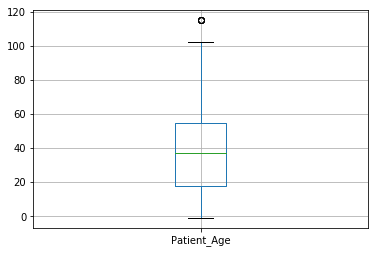

In [7]:
raw_data[['Patient_Age']].boxplot()
plt.show()

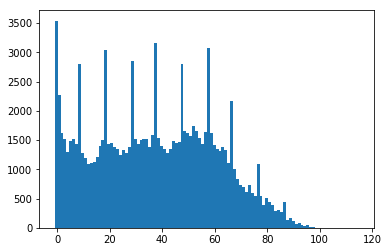

In [34]:
plt.hist(raw_data.Patient_Age, bins= len(raw_data.Patient_Age.unique()))
plt.show()

In [48]:
raw_data = raw_data.drop(raw_data.index[raw_data.Patient_Age < 0])
raw_data = raw_data.drop(raw_data.index[raw_data.Patient_Age > 100])
raw_data.Patient_Age.describe()

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Patient_Age, dtype: float64

In [112]:
raw_data.to_csv('Cleanned_MA.csv', encoding='utf-8', index= False)


### Feature engineering
Here we will focus on creating new features. Let us start by loading our cleaned data

In [4]:
data = pd.read_csv('Cleanned_MA.csv', encoding= 'utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 23 columns):
Patient_ID                      110519 non-null float64
Appointment_ID                  110519 non-null int64
Patient_Gender                  110519 non-null int64
Appointment_ScheduledDate       110519 non-null object
Appointment_Date                110519 non-null object
Patient_Age                     110519 non-null int64
Patient_Neighbourhood           110519 non-null object
Patient_Scholarship             110519 non-null int64
Patient_Hypertension            110519 non-null int64
Patient_Diabetes                110519 non-null int64
Patient_Alcoholism              110519 non-null int64
Patient_Handicap                110519 non-null int64
SMS_Received                    110519 non-null int64
No_Show                         110519 non-null int64
Appointment_Scheduled_Year      110519 non-null int64
Appointment_Scheduled_Month     110519 non-null int64
Appointment_Schedule

#### 1. Elapsed time:
Let us compute the elapsed time feature as the number of days between booking an appointment and the actual appointment. Low elapsed time can indicate an urgency from the patient while high elapsed time can indicate a routine check up

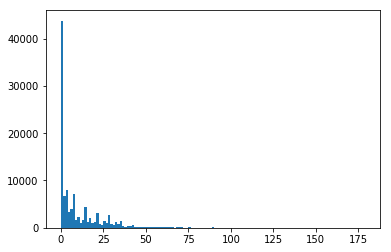

In [5]:
data['Appointment_ScheduledDate'] = pd.to_datetime(data['Appointment_ScheduledDate'])
data['Appointment_Date'] = pd.to_datetime(data['Appointment_Date'])
data['Appointment_ElapsedTime'] = data['Appointment_ScheduledDate'] - data['Appointment_Date']
data['Appointment_ElapsedTime'] = data['Appointment_ElapsedTime'].apply(lambda x: abs(x.days))

plt.hist(data.Appointment_ElapsedTime, bins= len(data.Appointment_ElapsedTime.unique()))
plt.show()


#### 2. Day of the week
The day of the week can have an important impact on the show up ratio since it is more convinient to attend a doctor's appoitnment on a Saturday than during week days due to other obligation such as school or work

In [6]:
data['Appointment_DayOfWeek'] = data['Appointment_Date'].dt.dayofweek
days = pd.get_dummies(data['Appointment_DayOfWeek'])

days_of_week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days.columns= days_of_week_names
data = data.join(days)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 31 columns):
Patient_ID                      110519 non-null float64
Appointment_ID                  110519 non-null int64
Patient_Gender                  110519 non-null int64
Appointment_ScheduledDate       110519 non-null datetime64[ns]
Appointment_Date                110519 non-null datetime64[ns]
Patient_Age                     110519 non-null int64
Patient_Neighbourhood           110519 non-null object
Patient_Scholarship             110519 non-null int64
Patient_Hypertension            110519 non-null int64
Patient_Diabetes                110519 non-null int64
Patient_Alcoholism              110519 non-null int64
Patient_Handicap                110519 non-null int64
SMS_Received                    110519 non-null int64
No_Show                         110519 non-null int64
Appointment_Scheduled_Year      110519 non-null int64
Appointment_Scheduled_Month     110519 non-null int64
Appo

#### 3. Patient no show history
Here, we are assuming that the probability of a patient to show is impacted by his previous attendance schemes


In [7]:
temp_1 = data.groupby('Patient_ID').count()
temp_2 = data.groupby('Patient_ID').sum()

no_show_per_patient = pd.DataFrame()
no_show_per_patient['No_Show_per_patient'] = temp_2['No_Show'] / temp_1['No_Show']

data['No_Show_per_patient'] = data.Patient_ID.apply(lambda x: no_show_per_patient.loc[x])
print(data[['No_Show_per_patient', 'No_Show']])

        No_Show_per_patient  No_Show
0                  0.000000        0
1                  0.000000        0
2                  0.000000        0
3                  0.500000        0
4                  0.000000        0
5                  0.000000        0
6                  1.000000        1
7                  1.000000        1
8                  0.000000        0
9                  0.000000        0
10                 0.000000        0
11                 1.000000        1
12                 0.000000        0
13                 0.000000        0
14                 0.000000        0
15                 0.000000        0
16                 0.000000        0
17                 1.000000        1
18                 0.000000        0
19                 0.000000        0
20                 1.000000        1
21                 0.500000        1
22                 1.000000        1
23                 0.000000        0
24                 0.000000        0
25                 0.000000        0
2

In [163]:
def getPreviousAppointmentRatio(row):
    ratio = 0
    patient_id = row['Patient_ID']
    appointment_date = row['Appointment_Date']
    temp = data[data['Patient_ID'] == patient_id]
    temp = temp[temp.Appointment_Date < appointment_date]
    if temp.empty:
        return ratio
    else:
        ratio = temp[['No_Show']].sum()/temp[['No_Show']].count()
    return ratio

data['Ratio_Adjusted'] = data.apply(getPreviousAppointmentRatio, axis= 1)


KeyError: ('Patient_ID', 'occurred at index Patient_ID')

In [19]:
data['Ratio_Adjusted'] = data[['Ratio_Adjusted']].astype(np.float64)
print(data['Ratio_Adjusted'].unique())

[ 0.          1.          0.25        0.33333333  0.5         0.66666667
  0.75        0.16666667  0.6         0.2         0.28571429  0.22222222
  0.08333333  0.14285714  0.4         0.42857143  0.07692308  0.83333333
  0.125       0.03225806  0.02631579  0.02        0.08695652  0.03846154
  0.1         0.05405405  0.02702703  0.02777778  0.04761905  0.05555556
  0.05        0.04        0.05882353  0.07894737  0.01886792  0.02857143
  0.02083333  0.025       0.06666667  0.11111111  0.09090909  0.03703704
  0.02272727  0.10526316  0.04166667  0.18181818  0.0625      0.05263158
  0.03333333  0.03030303  0.13333333  0.16        0.04347826  0.03448276
  0.01724138  0.01923077  0.07407407  0.15384615  0.06896552  0.08571429
  0.06060606  0.375       0.07142857  0.0952381   0.04878049  0.04545455
  0.07317073  0.04081633  0.01612903  0.02564103  0.03571429  0.11764706
  0.21428571  0.23076923  0.3         0.85714286  0.8         0.36363636
  0.23529412  0.17391304  0.18518519  0.57142857  0

In [98]:
winter_season = [1, 2, 10, 11, 12]
def computeSeason(row):
    month = row['Appointment_Date_Month']
    if(month in winter_season):
        return 1
    else:
        return 0
    
data['Winter'] = data.apply(computeSeason, axis= 1)
print(data[['Winter']].sum())

Winter    0
dtype: int64


In [100]:
data['Appointment_Date_Month'].unique()

array([4, 5, 6], dtype=int64)

In [129]:
def firstAppointment(row):
    patient_id = row['Patient_ID']
    appointment_date = row['Appointment_Date']
    temp = data[data['Patient_ID'] == patient_id]
    temp = temp[temp.Appointment_Date < appointment_date]
    if temp.empty:
        return 1
    else:
        return 0

data['First_Time'] = data.apply(firstAppointment, axis= 1)
data['First_Time'] = data[['First_Time']].astype(np.int64)


In [143]:
def previousAppointment(row):
    patient_id = row['Patient_ID']
    first_time = row['First_Time']
    if(first_time == 1):
        return 0
    appointment_date = row['Appointment_Date']
    temp = data[data['Patient_ID'] == patient_id]
    temp = temp[temp.Appointment_Date < appointment_date]
    if temp.empty:
        return 1
    else:
        temp = temp.sort_values('Appointment_Date', ascending=0)
        return temp['No_Show'].iloc[0]
    
data['Previous_Appointment'] = data.apply(previousAppointment, axis= 1)
data['Previous_Appointment'] = data[['Previous_Appointment']].astype(np.int64)

### Statistical analysis
Conduct a statistical analysis on the features with a deep dive on engineered features, Age, day of the week, month, SMS received, scholarship and diseases

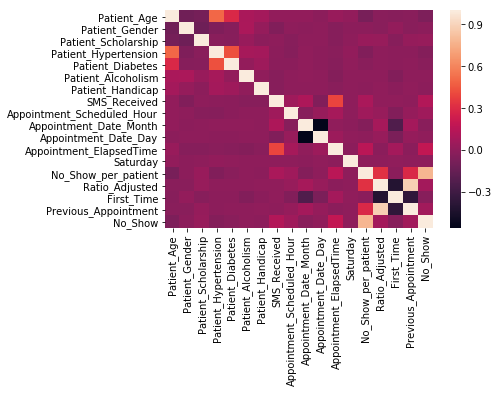

In [144]:
def corrolationMap(data, columns):
    temp = data[columns]
    sns.heatmap(temp.corr())
    plt.show()


predictors = ['Patient_Age', 'Patient_Gender', 'Patient_Scholarship', 'Patient_Hypertension', 'Patient_Diabetes', 
              'Patient_Alcoholism', 'Patient_Handicap', 'SMS_Received', 'Appointment_Scheduled_Hour', 'Appointment_Date_Month',
              'Appointment_Date_Day', 'Appointment_ElapsedTime', 'Saturday','No_Show_per_patient', 'Ratio_Adjusted', 
              'First_Time', 'Previous_Appointment', 'No_Show']
corrolationMap(data, predictors)

The heat map above confirms our interviews with experts in the field of medicine as Hypertnesion and diabetes are correlated and they also appear to be correlated with age.
The heat map allows us to take other valuable insight such as :
1. SMS received is positively correlated with elapsed time (this indicated that the higher the elapsed time, the more likely to receive an SMS reminder)
2. No show is statistically correlated with Age, Hypertension, diabetes, SMS received, Appoinment scheduled month, week day or not and elapsed time

In [34]:
sns.pairplot(data, hue="No_Show", vars=predictors, markers=["o", "s"])
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

In [ ]:
sns.pairplot(data, hue="No_Show", kind= "reg", vars=predictors, markers=["o", "s"])
plt.show()

In [33]:
def statisticalAnalysis(data, column_to_analyze, target):
    print('to implement')

### Factor analysis
Conduct a factor analysis to determine which predictors, or pair of predictors are the most important

In [32]:
def factorAnalysis(data, columns, target, factor):
    print('To implement')

### Building Models
In this part, we will build and evaluate different models. Each model should have 1) model fit, use k-fold 2) ROC and confusion matrix 3) parameter tuning

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV



predictors = [
    'Patient_Age', 
    'Patient_Gender', 
    'Patient_Scholarship', 
    'Patient_Hypertension', 
    'Patient_Diabetes', 
    'Patient_Alcoholism', 
    'Patient_Handicap', 
    'SMS_Received', 
    'Appointment_Date_Month',
    'Appointment_ElapsedTime', 
    'Saturday', 'Ratio_Adjusted', 
    'First_Time', 
    'Previous_Appointment',
    'No_Show_per_patient'
             ]
X = data[predictors]
y = data.No_Show
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 121, stratify= y)

In [146]:
def rocPlot(modelName, y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=modelName)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(modelName + ' ROC Curve')
    plt.show();
    print('AUC: ', roc_auc_score(y_test, y_pred_prob))

In [147]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [148]:
def gridSearch(model, param_grid, cv, x, y):
    grid = GridSearchCV(model, param_grid, cv= cv)
    grid.fit(x, y)
    return (grid.best_params_, grid.best_score_)

In [149]:
def parameterTuning(name, train_accuracy, train_f1, test_accuracy, test_f1, values):
    # Generate plot
    plt.title(name +': Varying parameter')
    ax = plt.gca()
    ax2 = ax.twinx()
    ax.plot(values, test_accuracy, label = 'Testing Accuracy')
    ax.plot(values, train_accuracy, label = 'Training Accuracy')
    ax2.plot(values, test_f1, label = 'Testing F1 Score', color='red')
    ax2.plot(values, train_f1, label = 'Training F1 Score', color='green')
    ax.set_xlabel('values')
    ax.set_ylabel('Accuracy')
    ax2.set_ylabel('F1 Score')
    ax.legend(loc=0)
    ax2.legend(loc=0)
    plt.show()

#### Logistic regression


             precision    recall  f1-score   support

          0       0.97      0.95      0.96     67422
          1       0.80      0.87      0.83     15467

avg / total       0.94      0.93      0.94     82889

F1 score achieved 0.8959074301577492
Normalized confusion matrix
[[ 0.9505206   0.0494794 ]
 [ 0.13357471  0.86642529]]


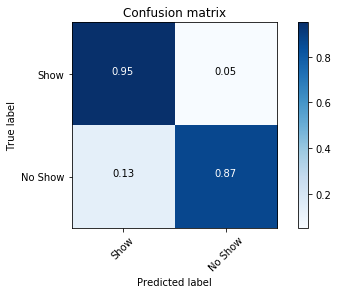

In [152]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_predict(logreg, X_train, y_train, cv=10)

report = classification_report(cv_scores, y_train)
conf_matrix = confusion_matrix(cv_scores, y_train)
print(report)
print('F1 score achieved {}'.format( f1_score(cv_scores, y_train, average="macro")))
plot_confusion_matrix(conf_matrix, ['Show', 'No Show'], normalize= True)

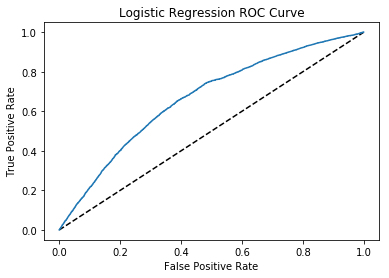

AUC:  0.665727510772


In [137]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
rocPlot('Logistic Regression', y_test, y_pred_prob)

So far, it seems that Logistic regression's performance is AUC: 96%, accuracy: 91% and F1 score: 85%

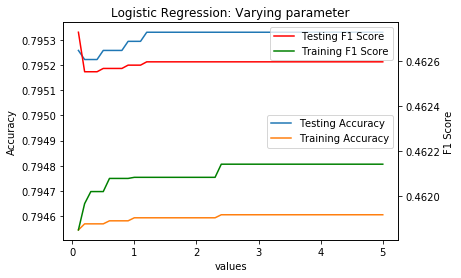

In [138]:
# Setup arrays to store train and test accuracies
C_values = np.linspace(0.1, 5.0, num=50)
train_accuracy = np.empty(len(C_values))
test_accuracy = np.empty(len(C_values))
train_f1 = np.empty(len(C_values))
test_f1 = np.empty(len(C_values))

# Loop over different values of k
for i, k in enumerate(C_values):
    logreg = LogisticRegression(C= k)
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_train)
    #Compute accuracy on the training set
    train_accuracy[i] = accuracy_score(y_train, y_pred)
    train_f1[i] = f1_score(y_train, y_pred, average="macro")

    y_pred = logreg.predict(X_test)
    #Compute accuracy on the testing set
    test_accuracy[i] = accuracy_score(y_test, y_pred)
    test_f1[i] = f1_score(y_test, y_pred, average="macro")

parameterTuning('Logistic Regression', train_accuracy, train_f1, test_accuracy, test_f1, C_values)

In [139]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

best_param, best_score = gridSearch(logreg, param_grid, 5, X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(best_param)) 
print("Best score is {}".format(best_score))

Tuned Logistic Regression Parameters: {'C': 1.0000000000000001e-05}
Best score is 0.7959439732654514


In [140]:
# Try breaking down by patient (different patient between train and test)
# Try breaking down by disease
# Try disease ignorant (take out the disease columns)

#### Neural network
In this part, we will try running a neural network

In [112]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping


predictors = ['Patient_Age', 'Patient_Gender', 'Patient_Scholarship', 'Patient_Hypertension', 'Patient_Diabetes', 
              'Patient_Alcoholism', 'Patient_Handicap', 'SMS_Received', 'Appointment_Date_Month',
              'Appointment_ElapsedTime', 'Saturday', 'Ratio_Adjusted']
X = data[predictors]
y = data.No_Show
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 121, stratify= y)


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)




In [113]:
# Train model
n_cols = data[predictors].shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

model.fit(X_train, y_train, verbose=False)

##Calculate performance on training
training = model.predict(X_train)
# Calculate predictions: predictions
predictions = model.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


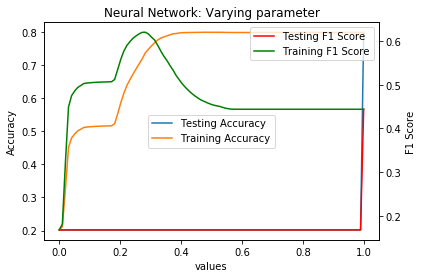

In [124]:
def paramNN(training, y_train, predictions, y_test):
    treshold = np.linspace(0, 1.0, num=100)
    
    f1_test = np.empty(len(treshold))
    acc_test = np.empty(len(treshold))
    f1_train = np.empty(len(treshold))
    acc_train = np.empty(len(treshold))
    
    for i,j in enumerate(treshold):
        pred = np.apply_along_axis(lambda x: 1 if x > j else 0, axis= 1, arr= predictions)
        f1_test[i] = f1_score(pred, y_test, average="macro")
        acc_test[i] = accuracy_score(pred, y_test)

        tr = np.apply_along_axis(lambda x: 1 if x > j else 0, axis= 1, arr= training)
        f1_train[i] = f1_score(tr, y_train, average="macro")
        acc_train[i] = accuracy_score(tr, y_train)
    parameterTuning('Neural Network', acc_train, f1_train, acc_test, f1_test, treshold)
    

paramNN(training, y_train,predictions, y_test)

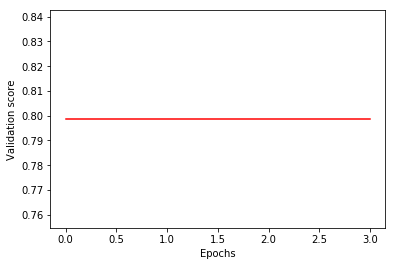

In [127]:

n_cols = data[predictors].shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience= 2)

# Fit the model
model_1_training = model.fit(X_train, y_train, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

plt.plot(model_1_training.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

#### New way of splitting the data:
We ahve been using a splitting the data in a naive way since it is possible to train for an appointment based on the true label of previous appointments, thus we need to make sure that the appointemnts we are testing for are happening after the appointment we are training for.
1. Sort by the appointment data
2. Set the split based on how man

In [175]:
predictors = ['Patient_ID', 'Patient_Age', 'Patient_Gender', 'Patient_Scholarship', 'Patient_Hypertension', 'Patient_Diabetes', 
              'Patient_Alcoholism', 'Patient_Handicap', 'SMS_Received', 'Appointment_Date_Month',
              'Appointment_ElapsedTime', 'Saturday', 'Ratio_Adjusted', 'First_Time', 'Previous_Appointment',
              'No_Show']
X = data[predictors]
y = data.No_Show
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 121, stratify= y)


temp_1 = X_train.groupby('Patient_ID').count()
temp_2 = X_train.groupby('Patient_ID').sum()

no_show_per_patient = pd.DataFrame()
no_show_per_patient['ratio'] = temp_2['No_Show'] / temp_1['No_Show']

X_train['ratio'] = X_train.Patient_ID.apply(lambda x: no_show_per_patient.loc[x])
X_train['ratio'] = X_train['ratio'].astype(np.float64)

print(X_train['ratio'].unique())
print(X_train.info())

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


[ 0.          0.5         0.57142857  0.33333333  0.1         1.          0.25
  0.66666667  0.16666667  0.04081633  0.2         0.02173913  0.14285714
  0.125       0.08333333  0.0625      0.4         0.625       0.83333333
  0.22222222  0.55555556  0.18181818  0.05970149  0.11111111  0.375
  0.27272727  0.35714286  0.38461538  0.04166667  0.6         0.04
  0.09090909  0.75        0.28571429  0.26666667  0.02439024  0.8
  0.42857143  0.05882353  0.28        0.05405405  0.71428571  0.1875      0.3
  0.44444444  0.17857143  0.21052632  0.03030303  0.13333333  0.06896552
  0.63636364  0.03703704  0.02857143  0.15384615  0.12903226  0.02083333
  0.07142857  0.06666667  0.21428571  0.36363636  0.17647059  0.30769231
  0.15        0.77777778  0.45454545  0.875       0.27777778  0.07692308
  0.85714286  0.76923077]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82889 entries, 52683 to 79166
Data columns (total 17 columns):
Patient_ID                 82889 non-null float64
Patient_Age    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [176]:
def adjust(row):
    patient_id = row['Patient_ID']
    p = X_train[X_train.Patient_ID == patient_id]
    if(p.empty):
        return 0
    else:
        return p['ratio'].iloc[0]
    
X_test['ratio'] = X_test.apply(adjust, axis= 1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [177]:
col_to_drop = ['Patient_ID', 'No_Show']
print(X_test.columns)
print(X_train.columns)
X_test = X_test.drop(columns= col_to_drop)
X_train = X_train.drop(columns= col_to_drop)

Index(['Patient_ID', 'Patient_Age', 'Patient_Gender', 'Patient_Scholarship',
       'Patient_Hypertension', 'Patient_Diabetes', 'Patient_Alcoholism',
       'Patient_Handicap', 'SMS_Received', 'Appointment_Date_Month',
       'Appointment_ElapsedTime', 'Saturday', 'Ratio_Adjusted', 'First_Time',
       'Previous_Appointment', 'No_Show', 'ratio'],
      dtype='object')
Index(['Patient_ID', 'Patient_Age', 'Patient_Gender', 'Patient_Scholarship',
       'Patient_Hypertension', 'Patient_Diabetes', 'Patient_Alcoholism',
       'Patient_Handicap', 'SMS_Received', 'Appointment_Date_Month',
       'Appointment_ElapsedTime', 'Saturday', 'Ratio_Adjusted', 'First_Time',
       'Previous_Appointment', 'No_Show', 'ratio'],
      dtype='object')


             precision    recall  f1-score   support

          0       0.97      0.95      0.96     67398
          1       0.82      0.88      0.85     15491

avg / total       0.94      0.94      0.94     82889

F1 score achieved 0.9070205625427998
Normalized confusion matrix
[[ 0.95493932  0.04506068]
 [ 0.11561552  0.88438448]]


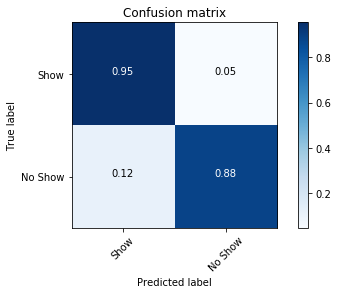

In [178]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_predict(logreg, X_train, y_train, cv=10)

report = classification_report(cv_scores, y_train)
conf_matrix = confusion_matrix(cv_scores, y_train)
print(report)
print('F1 score achieved {}'.format( f1_score(cv_scores, y_train, average="macro")))
plot_confusion_matrix(conf_matrix, ['Show', 'No Show'], normalize= True)

             precision    recall  f1-score   support

          0       0.91      0.82      0.86     24532
          1       0.19      0.35      0.25      3098

avg / total       0.83      0.76      0.79     27630

F1 score achieved 0.5541064277893578
Accuracy score achieved 0.7476655808903366
Normalized confusion matrix
[[ 0.81648459  0.18351541]
 [ 0.65235636  0.34764364]]


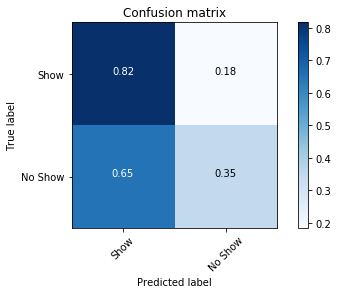

In [188]:
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
report = classification_report(predictions, y_test)
conf_matrix = confusion_matrix(predictions, y_test)
print(report)
print('F1 score achieved {}'.format( f1_score(predictions, y_test, average="macro")))
print('Accuracy score achieved {}'.format( accuracy_score(pred, y_test)))
plot_confusion_matrix(conf_matrix, ['Show', 'No Show'], normalize= True)

In [183]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


# Train model
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

model.fit(X_train, y_train, verbose=False)

##Calculate performance on training
training = model.predict(X_train)
# Calculate predictions: predictions
predictions = model.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


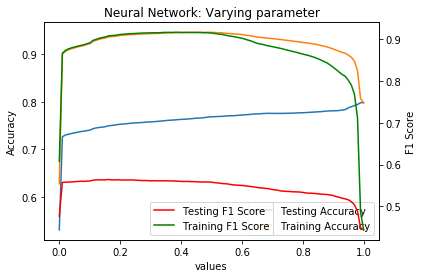

In [184]:
paramNN(training, y_train,predictions, y_test)

             precision    recall  f1-score   support

          0       0.88      0.82      0.85     23517
          1       0.24      0.33      0.28      4113

avg / total       0.78      0.75      0.76     27630

F1 score achieved 0.5638208616106415
Accuracy score achieved 0.7476655808903366
Normalized confusion matrix
[[ 0.82059787  0.17940213]
 [ 0.66934111  0.33065889]]


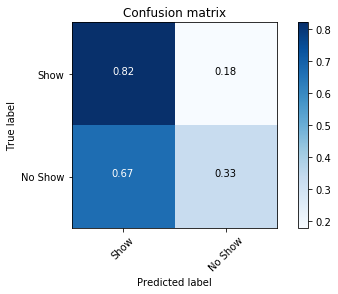

In [187]:
pred = pred = np.apply_along_axis(lambda x: 1 if x > 0.15 else 0, axis= 1, arr= predictions)
report = classification_report(pred, y_test)
conf_matrix = confusion_matrix(pred, y_test)
print(report)
print('F1 score achieved {}'.format( f1_score(pred, y_test, average="macro")))
print('Accuracy score achieved {}'.format( accuracy_score(pred, y_test)))
plot_confusion_matrix(conf_matrix, ['Show', 'No Show'], normalize= True)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
cv_scores = cross_val_predict(clf, X_train, y_train, cv=10)

report = classification_report(cv_scores, y_train)
conf_matrix = confusion_matrix(cv_scores, y_train)
print(report)
print('F1 score achieved {}'.format( f1_score(cv_scores, y_train, average="macro")))
plot_confusion_matrix(conf_matrix, ['Show', 'No Show'], normalize= True)


In [ ]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
report = classification_report(predictions, y_test)
conf_matrix = confusion_matrix(predictions, y_test)
print(report)
print('F1 score achieved {}'.format( f1_score(predictions, y_test, average="macro")))
print('Accuracy score achieved {}'.format( accuracy_score(pred, y_test)))
plot_confusion_matrix(conf_matrix, ['Show', 'No Show'], normalize= True)